# Class DFA: deterministic finite automata
From github: https://github.com/caleb531/automata/blob/main/docs/fa/class-dfa.md

Every DFA has the following (required) properties:

* states: a set of the DFA's valid states, each of which must be represented as a string
* input_symbols: a set of the DFA's valid input symbols, each of which must also be represented as a string
* transitions: a dict consisting of the transitions for each state. Each key is a state name and each value is a dict which maps a symbol (the key) to a state (the value).
* initial_state: the name of the initial state for this DFA
* final_states: a set of final states for this DFA
* allow_partial: by default, each DFA state must have a transition to every input symbol; if allow_partial is True, you can disable this characteristic (such that any DFA state can have fewer transitions than input symbols)



In [2]:
from IPython.display import Image, display

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)
    

In [1]:
from automata.fa.dfa import DFA
dfa = DFA(
    states={"q0", "q1", "q2", "q3", "q4"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"0": "q3", "1": "q1"},
        "q1": {"0": "q3", "1": "q2"},
        "q2": {"0": "q3", "1": "q2"},
        "q3": {"0": "q4", "1": "q1"},
        "q4": {"0": "q4", "1": "q1"},
    },
    initial_state="q0",
    final_states={"q2", "q4"},
)

dfa1 = DFA(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': 'q0', '1': 'q1'},
        'q1': {'0': 'q0', '1': 'q2'},
        'q2': {'0': 'q2', '1': 'q1'}
    },
    initial_state='q0',
    final_states={'q1'}
)
print(dfa)
print(dfa.states)
print(dfa.input_symbols)

pdot = dfa.show_diagram()
import networkx as nx
to_pdot = nx.drawing.nx_pydot.to_pydot
#pdot = to_pdot(nx.complete_graph(5))
#view_pydot(pdot)

DFA(states={'q3', 'q2', 'q0', 'q4', 'q1'}, input_symbols={'1', '0'}, transitions={'q0': {'0': 'q3', '1': 'q1'}, 'q1': {'0': 'q3', '1': 'q2'}, 'q2': {'0': 'q3', '1': 'q2'}, 'q3': {'0': 'q4', '1': 'q1'}, 'q4': {'0': 'q4', '1': 'q1'}}, initial_state='q0', final_states={'q4', 'q2'}, allow_partial=False)
frozenset({'q3', 'q2', 'q0', 'q4', 'q1'})
frozenset({'1', '0'})


# Visualization of automata & check inputs
Reference: https://pypi.org/project/visual-automata/


q0 	 1
q1 	 0
q2 	 0
q3 	 1
q4 	 1
target string	 1001000111
input stream	  001100100
output stream	 1001000111
          [Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             0         q1
2                 q1             0         q1
3                 q1             1        *q3
4                *q3             1         q1
5                 q1             0         q1
6                 q1             0         q1
7                 q1             1        *q3
8                *q3             0         q4
9                 q4             0        *q3


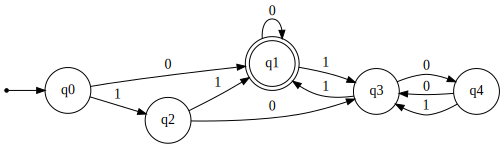

In [73]:
from visual_automata.fa.dfa import VisualDFA
import pickle
import numpy as np

with open('last_pop.pickle', 'rb') as f:
    last_pop = pickle.load(f)

top_machines = [ x for x in last_pop.population if x['fit'] == 1 ]
rng = np.random.default_rng()
def vis_automata(top):
    dfa = VisualDFA(
        states=set(list(top['states'].keys())), # set
        input_symbols = set(['0', '1']), # set
        transitions = top['transitions'], # dict
        initial_state = 'q0', # string
        final_states = set(['q3']) # set
    )
    for x in top['states']:
        print(x, "\t", top['states'][x])
    #rand_input = ''.join([ rng.choice(['0','1']) for _ in range(len(top['input_stream'])-1)])
    print("target string\t", top['target'])
    print("input stream\t ", top['input_stream'])
    print("output stream\t", top['output'])
    print(dfa.input_check(top['input_stream']))
    #print(dfa.input_check(rand_input))
    return dfa
    
vis_automata(top_machines[20])
dfa.show_diagram()


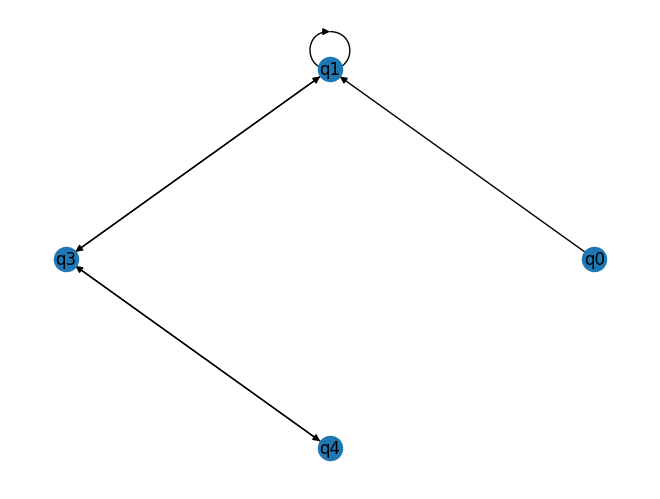

In [55]:
#Visualize path with networkx
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
for p in top['path']:
    G.add_edge(p[0], p[1], label = p[2])

nx.draw_circular(G, with_labels = True)    
#pos = nx.spring_layout(G)
#nx.draw_networkx_nodes(G, pos)
#nx.draw_networkx_edges(G, pos)
#nx.draw_networkx_labels(G, pos)
#nx.draw_networkx_edge_labels(G, pos)

plt.show()

      0    1
→q0  q0  *q1
*q1  q0   q2
q2   q2  *q1


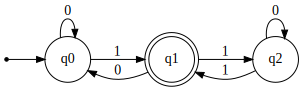

In [34]:
from visual_automata.fa.dfa import VisualDFA

dfa2 = VisualDFA(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': 'q0', '1': 'q1'},
        'q1': {'0': 'q0', '1': 'q2'},
        'q2': {'0': 'q2', '1': 'q1'}
    },
    initial_state='q0',
    final_states={'q1'}
)
dfa2.table
print(dfa2)
dfa2.show_diagram()

In [3]:
print(dfa2.input_check("10111"))
print(dfa2.input_check("10010"))

          [Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             1        *q1
2                *q1             0        →q0
3                →q0             1        *q1
4                *q1             1         q2
5                 q2             1        *q1
          [Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             1        *q1
2                *q1             0        →q0
3                →q0             0        →q0
4                →q0             1        *q1
5                *q1             0        →q0


In [5]:
print(dfa2)

      0    1
→q0  q0  *q1
*q1  q0   q2
q2   q2  *q1


In [7]:
# minimize: doesn't work
#minimal_dfa = VisualDFA.minify(dfa2)
#minimal_dfa.table
#minimal_dfa.show_diagram()

# converting into a VisualDFA
#from visual_automata.fa.dfa import VisualDFA
#dfa_visual = VisualDFA(dfa)
#dfa_visual.table

# Add mutations

In [22]:
# Implementing the mutaiton operator in Exmachina (Chap 5, p.95-96)
# each state has 1/3 chance for mutation
#     If so, add a single mutation
#       to either output or transition (p=1/2)
#           
import numpy as np
rng = np.random.default_rng()
def mutate_dfa(dfa, rng):
    transitions={}
    state_chosen = rng.choice(list(iter(dfa.states)))
    dict_state_chose = {}
    what_to_mutate = rng.choice(['action', 'transition'])
    print(state_chosen)
    print(what_to_mutate)
    
    if what_to_mutate == 'action': # change action
        to_state = rng.choice(list(iter(dfa.states))) # could be the same action (no mutation)
        for sym in dfa.input_symbols:
            if sym == action:
                
        transition{state_chosen} = {}
        print(to_state)
    else:
        input = rng.choice(list(iter(dfa.input_symbols)))
        print(input)
        trans_state = rng.choice(list(iter(dfa.states)))
        print(trans_state)

mutate_dfa(dfa2, rng)

q2
transition
0
q2


In [ ]:
import numpy as np
def build_population(N, p):
  """The population consists of N diploid individuals.
  
      Each individual has two chromosomes, containing
      allele "A" or "a", with probability p or 1-p,
      respectively.

      The population is a list of tuples.
  """
  population = []
  rng = np.random.default_rng() # instantiate a random number generator
  for i in range(N): # for each individual, it could be either of the four possible genotypes: AA, aa, Aa, aA
    # set allele 1 as A or a (with prob of p)
    allele1 = "A"
    if rng.random() > p: # draw a random number from 0 to 1, uniformally distributed
      allele1 = "a"

    # set allele 2 as A or a (with prob of p)
    allele2 = "A"
    if rng.random() > p:
      allele2 = "a"
    # a dipolid individual as a tuple
    population.append((allele1, allele2))
  return population

In [ ]:
def compute_frequencies(population):
  """ Count the genotypes.
      Returns a dictionary of genotypic frequencies.
  """
  # count the tuples (genotypes)
  AA = population.count(("A", "A"))
  Aa = population.count(("A", "a"))
  aA = population.count(("a", "A"))
  aa = population.count(("a", "a"))
  # return counts as a dict
  return({"AA": AA,
          "aa": aa,
          "Aa": Aa,
          "aA": aA})

In [ ]:
def reproduce_population(population): # simulating random mating
  """ Create new generation through reproduction
      For each of N new offspring,
      - choose the parents at random;
      - the offspring receives a chromosome from
        each of the parents.
  """
  new_generation = []
  N = len(population)
  rng = np.random.default_rng() # initialize a random number generator
  for i in range(N):
    # random integer between 0 and N-1
    dad = rng.integers(N) # pick an individual as dad
    mom = rng.integers(N) # pick an individual as mom (could be the same as dad by chance!!)
    # which chromosome comes from mom
    chr_mom = rng.choice([0,1]) # paternal or maternal copy from mom
    chr_dad =rng.choice([0,1]) # pateral or maternal copy from dad
    offspring = (population[mom][chr_mom], population[dad][chr_dad])
    new_generation.append(offspring)
  return(new_generation)

In [ ]:
def simulate_drift(N, p):
  # initialize the population
  my_pop = build_population(N, p)
  fixation = False # a logical variable to mark termination point (when true)
  num_generations = 0 # initialize a generation counter
  while fixation == False:
    # compute genotype counts
    genotype_counts = compute_frequencies(my_pop)
    # if one allele went to fixation, end
    if genotype_counts["AA"] == N or genotype_counts["aa"] == N:
      print("An allele reached fixation at generation", num_generations, end = "\t")
      print("The genotype counts are", end = "\t")
      print(genotype_counts)
      fixation == True
      break
    # if not, reproduce
    #print(num_generations, genotype_counts['AA']) # track genotype counts at each generation
    my_pop = reproduce_population(my_pop)
    num_generations = num_generations + 1